<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Артем! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<div class="alert alert-info">
Привет, Павел! Спасибо за содержательные комментарии, ниже оставил несколько своих вопросов,исправлений.
</div>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

План работы:
1. Изучить общую информацию из датафреймов.
2. Проверить правильность расчета эффективности обогащения в данных.
3. Сравнить состав признаков в обучающей и тестовой выборках.
4. Провести предобработку данных.
5. Проанализировать, как меняется концентрация металлов на различных стадиях очистки.
6. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
7. Исследовать суммарную концентрацию всех веществ на разных стадиях.
8. Обучить разные модели для прогнозирования эффективности обогащения чернового и финального концентрата и оценить их качество кросс-валидацией.
9. Выбрать лучшие модели по метрике sMAPE и проверить их на тестовой выборке.
10. Рассчитать значение итоговой метрики sMAPE и сравнить его с соответствующим значением, полученным для константной модели.

## Подготовка данных

In [72]:
# pip install nb_black

<IPython.core.display.Javascript object>

In [73]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>

Изучим данные.

Обучающая выборка:

In [75]:
df_train = pd.read_csv("gold_recovery_train_new.csv", sep=",")
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<IPython.core.display.Javascript object>

Тестовая выборка:

In [76]:
df_test = pd.read_csv("gold_recovery_test_new.csv", sep=",")
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


<IPython.core.display.Javascript object>

Исходные данные:

In [77]:
df_full = pd.read_csv("gold_recovery_full_new.csv", sep=",")
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<IPython.core.display.Javascript object>

Видим, что тестовая выборка содержит меньшее количество признаков, чем обучающая выборка и исходные данные.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке.

In [78]:
c_au = df_train[
    "rougher.output.concentrate_au"
]  # доля золота в концентрате после флотации/очистки;
f_au = df_train[
    "rougher.input.feed_au"
]  # доля золота в сырье/концентрате до флотации/очистки;
t_au = df_train[
    "rougher.output.tail_au"
]  # доля золота в отвальных хвостах после флотации/очистки.

recovery_train = (c_au * (f_au - t_au)) / (f_au * (c_au - t_au)) * 100
recovery_train

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

Найдите значение метрики MAE для рассчитанных значений  и значений признака `rougher.output.recovery`.

In [79]:
df_train["rougher.output.recovery"]

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

<IPython.core.display.Javascript object>

In [80]:
mean_absolute_error(recovery_train, df_train["rougher.output.recovery"])

9.73512347450521e-15

<IPython.core.display.Javascript object>

Получили достаточно малое значение отклонения теоретических значений эффективности обогащения от представленных в датасете, значит, данные обучающей выборки достоверны, и их можно использовать для дальнейшего анализа.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>👍</font>

Найдем признаки, которые есть в обучающей выборке, но недоступны в тестовой.

In [81]:
df_train.shape

(14149, 87)

<IPython.core.display.Javascript object>

In [82]:
df_test.shape

(5290, 53)

<IPython.core.display.Javascript object>

In [83]:
len(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))

34

<IPython.core.display.Javascript object>

In [84]:
sorted(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<IPython.core.display.Javascript object>

Таким образом, получаем, что в тестовой выборке отсутствуют данные по следующим признакам:
- финальные характеристики параметров продукта `final.output` (8 штук);
- параметры продукта на этапе первичной очистки `primary_cleaner.output` (8 штук);
- расчетные характеристики на этапе флотации `rougher.calculation` (4 штуки);
- параметры продукта на этапе флотации `rougher.output` (8 штук);
- параметры продукта на этапе вторичной очистки `secondary_cleaner.output` (4 штуки).
- финальная эффективность обогащения `final.output.recovery` и эффективность обогащения на этапе флотации `rougher.output.recovery` (два целевых признака).

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

Отсутствие признаков `output` и `calculation` в тестовой выборке объясняется тем, что данные по этим признакам поступают только после прохождения стадии очистки, а значения `recovery` прогнозируются по данным тестовой выборки, поэтому они тоже отсутствуют.

Проведем предобработку данных.

Удалим из обучающей выборки данные об отвальных хвостах и расчетные характеристики, так как они не будут использоваться в дальнейшем анализе данных и обучении моделей.

In [85]:
df_train.drop(
    [
        "final.output.tail_ag",
        "final.output.tail_au",
        "final.output.tail_pb",
        "final.output.tail_sol",
        "primary_cleaner.output.tail_ag",
        "primary_cleaner.output.tail_au",
        "primary_cleaner.output.tail_pb",
        "primary_cleaner.output.tail_sol",
        "rougher.calculation.au_pb_ratio",
        "rougher.calculation.floatbank10_sulfate_to_au_feed",
        "rougher.calculation.floatbank11_sulfate_to_au_feed",
        "rougher.calculation.sulfate_to_au_concentrate",
        "rougher.output.tail_ag",
        "rougher.output.tail_au",
        "rougher.output.tail_pb",
        "rougher.output.tail_sol",
        "secondary_cleaner.output.tail_ag",
        "secondary_cleaner.output.tail_au",
        "secondary_cleaner.output.tail_pb",
        "secondary_cleaner.output.tail_sol",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [86]:
sorted(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery']

<IPython.core.display.Javascript object>

Видим, что удаление прошло успешно.

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   final.output.concentrate_ag                 14148 non-null  float64
 2   final.output.concentrate_pb                 14148 non-null  float64
 3   final.output.concentrate_sol                13938 non-null  float64
 4   final.output.concentrate_au                 14149 non-null  float64
 5   final.output.recovery                       14149 non-null  float64
 6   primary_cleaner.input.sulfate               14129 non-null  float64
 7   primary_cleaner.input.depressant            14117 non-null  float64
 8   primary_cleaner.input.feed_size             14149 non-null  float64
 9   primary_cleaner.input.xanthate              14049 non-null  float64
 10  primary_cl

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> В момент предполгаемого применения модели в продакте, доступны только признаки собранные в тестовом датасете. Нужно построить модель работающую только с этими признаками.</font>

In [88]:
df_train_na = (df_train.isna().mean() * 100).sort_values(ascending=False).to_frame()

<IPython.core.display.Javascript object>

In [89]:
df_train_na[df_train_na[0] > 0]

,0
rougher.state.floatbank10_e_air,3.081490
rougher.input.floatbank11_xanthate,3.024949
primary_cleaner.output.concentrate_sol,2.021344
secondary_cleaner.state.floatbank2_a_air,1.533677
final.output.concentrate_sol,1.491271
rougher.input.feed_size,1.017740
rougher.input.feed_pb,0.706764
primary_cleaner.input.xanthate,0.706764
primary_cleaner.output.concentrate_pb,0.607817
rougher.input.feed_sol,0.551276


<IPython.core.display.Javascript object>

In [90]:
len(df_train_na[df_train_na[0] > 0])

50

<IPython.core.display.Javascript object>

Видим, что в обучающей выборке в некоторых признаках присутствуют пропуски и их достаточное количество. Заменим пропуски значениями из соответствующих параметров, соседних по времени.

In [91]:
df_train.ffill(axis=0, inplace=True)

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

In [92]:
(df_train.isna().mean() * 100).sort_values(ascending=False).to_frame()

,0
date,0.0
secondary_cleaner.state.floatbank2_a_level,0.0
rougher.output.recovery,0.0
rougher.state.floatbank10_a_air,0.0
rougher.state.floatbank10_a_level,0.0
...,...
rougher.input.floatbank10_sulfate,0.0
rougher.input.floatbank10_xanthate,0.0
rougher.input.floatbank11_sulfate,0.0
rougher.input.floatbank11_xanthate,0.0


<IPython.core.display.Javascript object>

Пропуски в обучающей выборке обработаны.

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<IPython.core.display.Javascript object>

In [94]:
(df_test.isna().mean() * 100).sort_values(ascending=False).to_frame().head(15)

,0
rougher.input.floatbank11_xanthate,0.472590
rougher.input.feed_sol,0.396975
secondary_cleaner.state.floatbank3_a_air,0.170132
rougher.input.floatbank11_sulfate,0.151229
primary_cleaner.input.depressant,0.094518
rougher.input.floatbank10_sulfate,0.094518
primary_cleaner.input.xanthate,0.075614
primary_cleaner.input.sulfate,0.075614
rougher.input.feed_rate,0.056711
secondary_cleaner.state.floatbank2_a_air,0.056711


<IPython.core.display.Javascript object>

В тестовой выборке также присутствуют пропущенные значения, обработаем их аналогично.

In [95]:
df_test.ffill(axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [96]:
(df_test.isna().mean() * 100).sort_values(ascending=False).to_frame().head(15)

,0
date,0.0
rougher.state.floatbank10_c_air,0.0
rougher.state.floatbank10_d_air,0.0
rougher.state.floatbank10_d_level,0.0
rougher.state.floatbank10_e_air,0.0
rougher.state.floatbank10_e_level,0.0
rougher.state.floatbank10_f_air,0.0
rougher.state.floatbank10_f_level,0.0
secondary_cleaner.state.floatbank2_a_air,0.0
secondary_cleaner.state.floatbank2_a_level,0.0


<IPython.core.display.Javascript object>

Удаление пропусков в тестовой выборке прошло успешно.

Проверим данные на аномальные значения. Значения эффективности обогащения должны быть в пределах от 0 до 100.

In [97]:
len(
    df_train[
        (df_train["final.output.recovery"] > 100)
        & (df_train["final.output.recovery"] < 0)
    ]
)

0

<IPython.core.display.Javascript object>

In [98]:
len(
    df_train[
        (df_train["rougher.output.recovery"] > 100)
        & (df_train["rougher.output.recovery"] < 0)
    ]
)

0

<IPython.core.display.Javascript object>

Аномальных значений не найдено.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверим данные на наличие дубликатов.

In [99]:
df_train.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [100]:
df_test.duplicated().sum()

0

<IPython.core.display.Javascript object>

Дубликатов не найдено.

Проверим также, чтобы не было показаний с одним и тем же временем.

In [101]:
df_train["date"].duplicated().sum()

0

<IPython.core.display.Javascript object>

In [102]:
df_test["date"].duplicated().sum()

0

<IPython.core.display.Javascript object>

Таких данных тоже не найдено.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

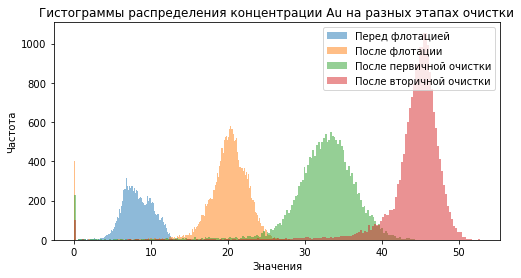

<IPython.core.display.Javascript object>

In [103]:
plt.hist(df_full["rougher.input.feed_au"], bins=200, alpha=0.5, label="Перед флотацией")
plt.hist(
    df_full["rougher.output.concentrate_au"],
    bins=200,
    alpha=0.5,
    label="После флотации",
)
plt.hist(
    df_full["primary_cleaner.output.concentrate_au"],
    bins=200,
    alpha=0.5,
    label="После первичной очистки",
)
plt.hist(
    df_full["final.output.concentrate_au"],
    bins=200,
    alpha=0.5,
    label="После вторичной очистки",
)

plt.xlabel("Значения")
plt.ylabel("Частота")

plt.legend(loc="upper right")
plt.title("Гистограммы распределения концентрации Au на разных этапах очистки")
plt.rcParams["figure.figsize"] = (8, 10)

plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Наглядней разместить все стадии одного металла на одном грвфике. Так лучше видно динамику процесса.</font>

<div class="alert alert-info">
Сделано!
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! </font>

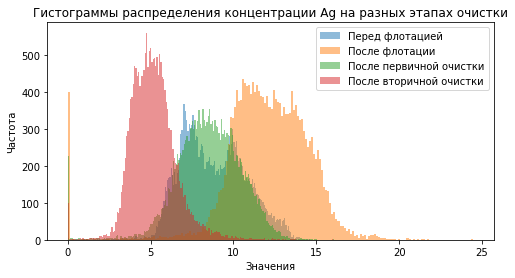

<IPython.core.display.Javascript object>

In [182]:
plt.hist(df_full["rougher.input.feed_ag"], bins=200, alpha=0.5, label="Перед флотацией")
plt.hist(
    df_full["rougher.output.concentrate_ag"],
    bins=200,
    alpha=0.5,
    label="После флотации",
)
plt.hist(
    df_full["primary_cleaner.output.concentrate_ag"],
    bins=200,
    alpha=0.5,
    label="После первичной очистки",
)
plt.hist(
    df_full["final.output.concentrate_ag"],
    bins=200,
    alpha=0.5,
    label="После вторичной очистки",
)

plt.xlabel("Значения")
plt.ylabel("Частота")

plt.legend(loc="upper right")
plt.title("Гистограммы распределения концентрации Ag на разных этапах очистки")
plt.rcParams["figure.figsize"] = (8, 6)

plt.show()

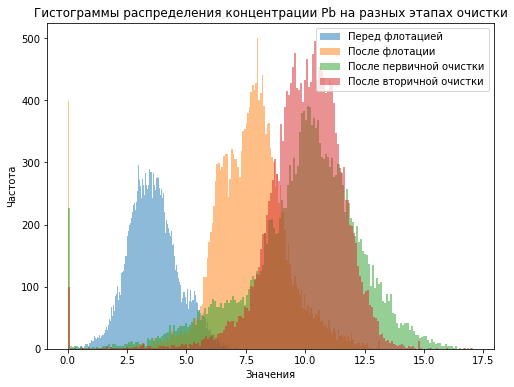

<IPython.core.display.Javascript object>

In [183]:
plt.hist(df_full["rougher.input.feed_pb"], bins=200, alpha=0.5, label="Перед флотацией")
plt.hist(
    df_full["rougher.output.concentrate_pb"],
    bins=200,
    alpha=0.5,
    label="После флотации",
)
plt.hist(
    df_full["primary_cleaner.output.concentrate_pb"],
    bins=200,
    alpha=0.5,
    label="После первичной очистки",
)
plt.hist(
    df_full["final.output.concentrate_pb"],
    bins=200,
    alpha=0.5,
    label="После вторичной очистки",
)

plt.xlabel("Значения")
plt.ylabel("Частота")

plt.legend(loc="upper right")
plt.title("Гистограммы распределения концентрации Pb на разных этапах очистки")
plt.rcParams["figure.figsize"] = (8, 6)

plt.show()

Видим, что для каждого из металлов на каждом этапе очистки увеличивается их концентрация, но при этом появляется достаточно большое количество наблюдений с нулевой концентрацией для каждого из металлов. С одной стороны, такие значения возможны, если в текущем состоянии руды нет какого-то металла, но содержатся другие, но с другой стороны, такие нулевые значения могут быть и аномальными, если суммарная концентрация драгоценных металлов будет нулевой. Второй случай исследуем далее.

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Посмотри как ведёт себя серебро.</font>

<div class="alert alert-info">
Из гистограмм для серебра следует, что после флотации концентрация возрастает, а потом на этапах первичной и вторичной обработки она уменьшается. О чем это может говорить?
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Видимо, сначала отделяются именно металлы, а потом при очистке золото отделяется от других металлов.</font>

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

Сначала сравним значения этого параметра на этапе флотации.

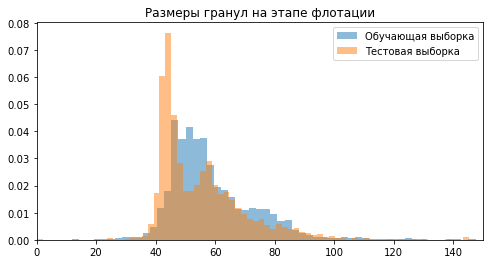

<IPython.core.display.Javascript object>

In [106]:
plt.hist(
    df_train["rougher.input.feed_size"],
    bins=200,
    alpha=0.5,
    label="Обучающая выборка",
    density=True,
)
plt.hist(
    df_test["rougher.input.feed_size"],
    bins=200,
    alpha=0.5,
    label="Тестовая выборка",
    density=True,
)
plt.legend(loc="upper right")
plt.title("Размеры гранул на этапе флотации")
plt.xlim(0, 150)

plt.show()

In [107]:
df_train["rougher.input.feed_size"].mean()

60.23985599255736

<IPython.core.display.Javascript object>

In [108]:
df_test["rougher.input.feed_size"].mean()

55.95275402889511

<IPython.core.display.Javascript object>

In [109]:
np.var(df_train["rougher.input.feed_size"])

529.2068649509116

<IPython.core.display.Javascript object>

In [110]:
np.var(df_test["rougher.input.feed_size"])

363.99032899257816

<IPython.core.display.Javascript object>

Видим, что размеры гранул на этапе флотации в обучающей и тестовой выборках имеют похожий вид распределения, средние значения очень близки, дисперсия на обучающей выборке чуть выше из-за большого количества наблюдений.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font> \
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.</font>

<div class="alert alert-info">
А почему в данном случае важно использовать именно доли, а не количество?
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Потому, что количество наблюдений разное (выборки разного размера), поэтому оценивать нужно нормализованное по плотности распределение. </font>

Теперь проанализируем распределения данного параметра на этапе первичной очистки.

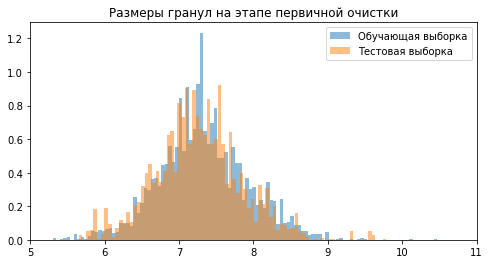

<IPython.core.display.Javascript object>

In [111]:
plt.hist(
    df_train["primary_cleaner.input.feed_size"],
    bins=200,
    alpha=0.5,
    label="Обучающая выборка",
    density=True,
)
plt.hist(
    df_test["primary_cleaner.input.feed_size"],
    bins=200,
    alpha=0.5,
    label="Тестовая выборка",
    density=True,
)
plt.legend(loc="upper right")
plt.title("Размеры гранул на этапе первичной очистки")
plt.xlim(5, 11)

plt.show()

In [112]:
df_train["primary_cleaner.input.feed_size"].mean()

7.322309906901298

<IPython.core.display.Javascript object>

In [113]:
df_test["primary_cleaner.input.feed_size"].mean()

7.266339191270909

<IPython.core.display.Javascript object>

In [114]:
np.var(df_train["primary_cleaner.input.feed_size"])

0.37704581413289107

<IPython.core.display.Javascript object>

In [115]:
np.var(df_test["primary_cleaner.input.feed_size"])

0.37229655777221865

<IPython.core.display.Javascript object>

Из полученных результатов следует, что размеры гранул в обучающей и тестовой выборках имеют нормальное распределение, почти идентичные значения средних значений и дисперсий.

Также из полученных гистограмм распределений стоит заметить, что размеры гранул с каждым этапом очистки уменьшаются, что соответствует логике технологического процесса.

В итоге получили, что распределения размеров гранул на обучающей и тестово выборках сильно не отличаются, значит, можно будет использовать данную тестовую выборку для оценки моделей, построенных на основе даннной обучающей выборки.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Исследуем обучающую выборку.

In [116]:
rougher_input_concentrate_cols = [
    "rougher.input.feed_ag",
    "rougher.input.feed_pb",
    "rougher.input.feed_sol",
    "rougher.input.feed_au",
]

<IPython.core.display.Javascript object>

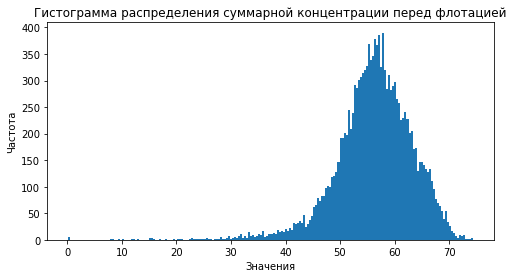

<IPython.core.display.Javascript object>

In [117]:
ax = plt.subplot()

ax.hist(df_train[rougher_input_concentrate_cols].sum(axis=1), bins=200)
ax.set_title("Гистограмма распределения суммарной концентрации перед флотацией")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [118]:
len(df_train[df_train[rougher_input_concentrate_cols].sum(axis=1) == 0])

0

<IPython.core.display.Javascript object>

In [119]:
rougher_output_concentrate_cols = [
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_sol",
    "rougher.output.concentrate_au",
]

<IPython.core.display.Javascript object>

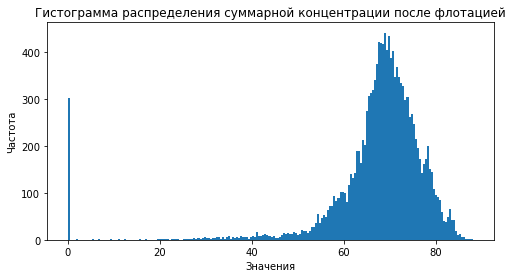

<IPython.core.display.Javascript object>

In [120]:
ax = plt.subplot()

ax.hist(df_train[rougher_output_concentrate_cols].sum(axis=1), bins=200)
ax.set_title("Гистограмма распределения суммарной концентрации после флотацией")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [121]:
len(df_train[df_train[rougher_output_concentrate_cols].sum(axis=1) == 0])

297

<IPython.core.display.Javascript object>

In [122]:
primary_cleaner_output_concentrate_cols = [
    "primary_cleaner.output.concentrate_ag",
    "primary_cleaner.output.concentrate_pb",
    "primary_cleaner.output.concentrate_sol",
    "primary_cleaner.output.concentrate_au",
]

<IPython.core.display.Javascript object>

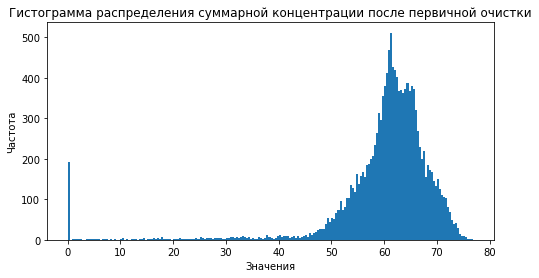

<IPython.core.display.Javascript object>

In [123]:
ax = plt.subplot()

ax.hist(df_train[primary_cleaner_output_concentrate_cols].sum(axis=1), bins=200)
ax.set_title("Гистограмма распределения суммарной концентрации после первичной очистки")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [124]:
len(df_train[df_train[primary_cleaner_output_concentrate_cols].sum(axis=1) == 0])

74

<IPython.core.display.Javascript object>

In [125]:
final_output_concentrate_cols = [
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_sol",
    "final.output.concentrate_au",
]

<IPython.core.display.Javascript object>

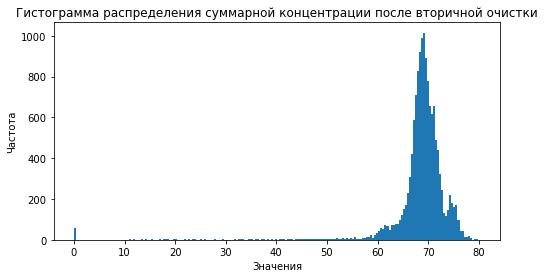

<IPython.core.display.Javascript object>

In [126]:
ax = plt.subplot()

ax.hist(df_train[final_output_concentrate_cols].sum(axis=1), bins=200)
ax.set_title("Гистограмма распределения суммарной концентрации после вторичной очистки")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [127]:
len(df_train[df_train[final_output_concentrate_cols].sum(axis=1) == 0])

58

<IPython.core.display.Javascript object>

Получили, что существуют состояния руды с нулевой суммарной концентрацией драгоценных металлов. Такие значения стоит считать аномальными, скорее всего их появление связано с ошибкой измерений. 

Удалим такие наблюдения из обучающей выборки.

In [128]:
df_train = df_train[
    (df_train[rougher_output_concentrate_cols].sum(axis=1) > 0)
    & (df_train[primary_cleaner_output_concentrate_cols].sum(axis=1) > 0)
    & (df_train[final_output_concentrate_cols].sum(axis=1) > 0)
]

<IPython.core.display.Javascript object>

In [129]:
len(df_train[df_train[rougher_output_concentrate_cols].sum(axis=1) == 0])

0

<IPython.core.display.Javascript object>

In [130]:
len(df_train[df_train[primary_cleaner_output_concentrate_cols].sum(axis=1) == 0])

0

<IPython.core.display.Javascript object>

In [131]:
len(df_train[df_train[final_output_concentrate_cols].sum(axis=1) == 0])

0

<IPython.core.display.Javascript object>

Удаление нулевых аномальных значений прошло успешно.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Выбросы удалены.</font>

Проведем аналогичное исследование для тестовой выборки. Для нее доступны данные только по концентрации металлов в руде перед флотацией, исследуем их.

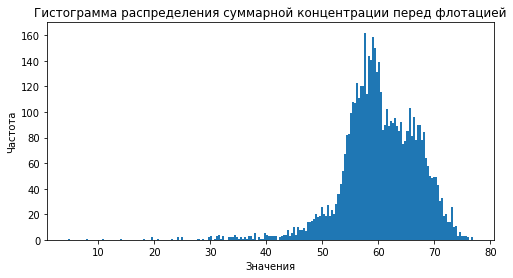

<IPython.core.display.Javascript object>

In [132]:
ax = plt.subplot()

ax.hist(df_test[rougher_input_concentrate_cols].sum(axis=1), bins=200)
ax.set_title("Гистограмма распределения суммарной концентрации перед флотацией")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [133]:
len(df_test[df_test[rougher_input_concentrate_cols].sum(axis=1) == 0])

0

<IPython.core.display.Javascript object>

Как видим, на этом этапе очистки нет аномальных значений, поэтому исследование тестовой выборки можно считать завершенным.

## Модель

Проверим еще раз отличие состава признаков обучающей и тестовой выборок.

In [134]:
sorted(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery']

<IPython.core.display.Javascript object>

Как видим, в обучающей выборке по-прежнему присутствуют данные о концентрациях металлов на различных этапах очистки, но которых нет в тестовой выборке, значит, они не важны при построении модели, удалим их.

In [135]:
df_train.drop(
    [
        "final.output.concentrate_ag",
        "final.output.concentrate_au",
        "final.output.concentrate_pb",
        "final.output.concentrate_sol",
        "primary_cleaner.output.concentrate_ag",
        "primary_cleaner.output.concentrate_au",
        "primary_cleaner.output.concentrate_pb",
        "primary_cleaner.output.concentrate_sol",
        "rougher.output.concentrate_ag",
        "rougher.output.concentrate_au",
        "rougher.output.concentrate_pb",
        "rougher.output.concentrate_sol",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [136]:
sorted(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))

['final.output.recovery', 'rougher.output.recovery']

<IPython.core.display.Javascript object>

Удаление проведено успешно.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Напишем функцию для вычисления метрик sMAPE и функцию для вычисления итогового значения sMAPE.

In [137]:
def smape(target, predictions):
    smape_p = (
        ((abs(target - predictions) / (0.5 * (abs(target) + abs(predictions)))).sum())
        / len(target)
    ) * 100
    return smape_p

<IPython.core.display.Javascript object>

In [138]:
def resulted_smape(smape_rougher, smape_final):
    smape_resulted = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_resulted

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` и `resulted_smape` расчитаны верно.</font>

Получим признаки для обучения моделей и целевые признаки для обучающей и тестовой выборки.

In [139]:
df_test["date"] = pd.to_datetime(df_test["date"])

<IPython.core.display.Javascript object>

In [140]:
df_full["date"] = pd.to_datetime(df_full["date"])

<IPython.core.display.Javascript object>

In [141]:
df_test.set_index("date", inplace=True)

<IPython.core.display.Javascript object>

In [142]:
df_train.set_index("date", inplace=True)

<IPython.core.display.Javascript object>

In [143]:
df_full.set_index("date", inplace=True)

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно, лучше привязаться ко времени.</font>

In [144]:
features_train = df_train.drop(
    ["final.output.recovery", "rougher.output.recovery"], axis=1
)
target_train = df_train[["final.output.recovery", "rougher.output.recovery"]]

<IPython.core.display.Javascript object>

In [145]:
features_train.shape

(13725, 52)

<IPython.core.display.Javascript object>

In [146]:
target_train.shape

(13725, 2)

<IPython.core.display.Javascript object>

In [147]:
features_train.index

Index(['2016-01-15 00:00:00', '2016-01-15 01:00:00', '2016-01-15 02:00:00',
       '2016-01-15 03:00:00', '2016-01-15 04:00:00', '2016-01-15 05:00:00',
       '2016-01-15 06:00:00', '2016-01-15 07:00:00', '2016-01-15 08:00:00',
       '2016-01-15 09:00:00',
       ...
       '2018-08-18 01:59:59', '2018-08-18 02:59:59', '2018-08-18 03:59:59',
       '2018-08-18 04:59:59', '2018-08-18 05:59:59', '2018-08-18 06:59:59',
       '2018-08-18 07:59:59', '2018-08-18 08:59:59', '2018-08-18 09:59:59',
       '2018-08-18 10:59:59'],
      dtype='object', name='date', length=13725)

<IPython.core.display.Javascript object>

In [148]:
target_train.index

Index(['2016-01-15 00:00:00', '2016-01-15 01:00:00', '2016-01-15 02:00:00',
       '2016-01-15 03:00:00', '2016-01-15 04:00:00', '2016-01-15 05:00:00',
       '2016-01-15 06:00:00', '2016-01-15 07:00:00', '2016-01-15 08:00:00',
       '2016-01-15 09:00:00',
       ...
       '2018-08-18 01:59:59', '2018-08-18 02:59:59', '2018-08-18 03:59:59',
       '2018-08-18 04:59:59', '2018-08-18 05:59:59', '2018-08-18 06:59:59',
       '2018-08-18 07:59:59', '2018-08-18 08:59:59', '2018-08-18 09:59:59',
       '2018-08-18 10:59:59'],
      dtype='object', name='date', length=13725)

<IPython.core.display.Javascript object>

In [149]:
features_test = df_test

<IPython.core.display.Javascript object>

In [150]:
features_test.shape

(5290, 52)

<IPython.core.display.Javascript object>

In [151]:
target_test = df_full.loc[df_test.index][
    ["final.output.recovery", "rougher.output.recovery"]
]

<IPython.core.display.Javascript object>

In [152]:
target_test.shape

(5290, 2)

<IPython.core.display.Javascript object>

In [153]:
features_test.index

DatetimeIndex(['2016-09-01 00:59:59', '2016-09-01 01:59:59',
               '2016-09-01 02:59:59', '2016-09-01 03:59:59',
               '2016-09-01 04:59:59', '2016-09-01 05:59:59',
               '2016-09-01 06:59:59', '2016-09-01 07:59:59',
               '2016-09-01 08:59:59', '2016-09-01 09:59:59',
               ...
               '2017-12-31 14:59:59', '2017-12-31 15:59:59',
               '2017-12-31 16:59:59', '2017-12-31 17:59:59',
               '2017-12-31 18:59:59', '2017-12-31 19:59:59',
               '2017-12-31 20:59:59', '2017-12-31 21:59:59',
               '2017-12-31 22:59:59', '2017-12-31 23:59:59'],
              dtype='datetime64[ns]', name='date', length=5290, freq=None)

<IPython.core.display.Javascript object>

In [154]:
target_test.index

DatetimeIndex(['2016-09-01 00:59:59', '2016-09-01 01:59:59',
               '2016-09-01 02:59:59', '2016-09-01 03:59:59',
               '2016-09-01 04:59:59', '2016-09-01 05:59:59',
               '2016-09-01 06:59:59', '2016-09-01 07:59:59',
               '2016-09-01 08:59:59', '2016-09-01 09:59:59',
               ...
               '2017-12-31 14:59:59', '2017-12-31 15:59:59',
               '2017-12-31 16:59:59', '2017-12-31 17:59:59',
               '2017-12-31 18:59:59', '2017-12-31 19:59:59',
               '2017-12-31 20:59:59', '2017-12-31 21:59:59',
               '2017-12-31 22:59:59', '2017-12-31 23:59:59'],
              dtype='datetime64[ns]', name='date', length=5290, freq=None)

<IPython.core.display.Javascript object>

Индексы и размеры признаков feature и target для обучающей и тестовой выборки совпали.

Проведем масштабирование признаков в обучающей и тестовой выборках.

In [155]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<IPython.core.display.Javascript object>

In [156]:
numeric = features_train.columns.tolist()
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что scaler был обучен только на тренировочной части данных!</font>

In [157]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.173278,0.376744,-0.120145,0.278325,-0.452937,-0.300995,-0.434982,-0.811214,-0.439688,-0.278044,...,-1.057587,-0.474154,-0.650048,-0.755710,-1.185594,-0.381542,-0.870463,-0.428316,-0.963476,-2.681618
2016-01-15 01:00:00,-0.210699,0.426690,-0.120145,0.315356,-0.247143,-0.357495,-0.247701,-0.323427,-0.244745,-0.296765,...,-1.061902,-0.533721,-0.678409,-0.697723,-1.166093,-0.430402,-0.886891,-0.431169,-0.990228,-2.517792
2016-01-15 02:00:00,-0.256989,0.730022,-0.120145,0.285000,-0.049158,-0.331775,-0.061035,-0.345309,-0.050630,-0.341651,...,-1.057907,-0.474804,-0.685574,-0.694328,-1.160657,-0.429328,-0.881850,-0.429512,-0.984928,-2.562171
2016-01-15 03:00:00,-0.296632,0.731765,-0.120145,0.299577,-0.061537,-0.358823,-0.058953,-0.317858,-0.063313,-0.337550,...,-1.054130,-0.441940,-0.669103,-0.695361,-1.177916,-0.404961,-0.888177,-0.422799,-0.988969,-2.523446
2016-01-15 04:00:00,-0.406177,0.907655,-0.120145,0.334548,-0.050846,-0.302790,-0.053005,-0.336917,-0.068703,-0.342173,...,-1.055749,-0.421816,-0.677926,-0.692966,-1.185581,-0.470249,-0.902558,-0.425368,-0.990526,-2.564046


<IPython.core.display.Javascript object>

Видим, что масштабирование прошло успешно.

Построим модели и найдем ту, для которой значения sMAPE для `final.output.recovery` и `rougher.output.recovery` минимальны.

In [158]:
RANDOM_STATE = 12345

<IPython.core.display.Javascript object>

Построим сначала модели для `rougher.output.recovery`.

Получим предсказания на обучающей выборке, используя модель линейной регрессии.

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'><s> В задании предлагается оценивать модели кроссвалидацией, для этого валидационная выборка не нужна. Однако выделяя валидационную выборку, мы сокращаем обучающие данные.</s></font>

In [159]:
scorer = make_scorer(smape, greater_is_better=False)

<IPython.core.display.Javascript object>

In [170]:
model = LinearRegression()
scores = cross_val_score(
    model, features_train, target_train["rougher.output.recovery"], scoring=scorer, cv=5
)
(scores * (-1)).min()

4.8683933207065735

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Оценивать модель нужно кроссвалидацией на основе нашей метрики, то есть smape.</s></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> В sklearn для кроссвалидации есть готовый инструмент cross_val_score. Чтобы предать в него нашу метрику, нужно сделать Скорер (можно с помощью инструмента make_scorer) и предать его в атрибут scoring функции cross_val_score.</font>

<div class="alert alert-info">
Надеюсь, правильно применил cross_val_score.
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Всё верно! Классно, что пробуешь новые инструменты.\
Немного смущает имя переменной `clf`. У нас здесть регрессор и назвать лучше `estm` или просто model. </font>

Рассмотрим теперь дерево решений.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [739]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)
parameters = {"max_depth": range(1, 10, 1)}
grid_tr = GridSearchCV(model, parameters, cv=5, scoring=scorer)
grid_tr.fit(features_train, target_train["rougher.output.recovery"])
grid_tr.best_params_

{'max_depth': 4}

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [740]:
grid_tr.best_score_ * (-1)

7.313406029649701

<IPython.core.display.Javascript object>

Построим теперь модель случайного леса.

In [742]:
%%time
model = RandomForestRegressor(random_state=RANDOM_STATE)
parameters = {"n_estimators": range(100, 201, 10), "max_depth": range(1, 5, 1)}
grid = GridSearchCV(model, parameters, cv=5, scoring=scorer)
grid.fit(features_train, target_train["rougher.output.recovery"])
grid.best_params_

Wall time: 45min 41s


{'max_depth': 3, 'n_estimators': 190}

<IPython.core.display.Javascript object>

In [743]:
grid.best_score_ * (-1)

6.619389939817

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Из полученных резельтатов следует, что в качестве лучшей модели следует выбрать модель линейной регрессии.

Построим теперь модели для `final.output.recovery`.

Получим предсказания на обучающей выборке, используя модель линейной регрессии.

In [171]:
model = LinearRegression()
scores = cross_val_score(
    model, features_train, target_train["final.output.recovery"], scoring=scorer, cv=5
)
(scores * (-1)).min()

9.083636031879424

<IPython.core.display.Javascript object>

Рассмотрим теперь дерево решений.

In [733]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)
parameters = {"max_depth": range(1, 10, 1)}
grid_tr = GridSearchCV(model, parameters, cv=5, scoring=scorer)
grid_tr.fit(features_train, target_train["final.output.recovery"])
grid_tr.best_params_

{'max_depth': 3}

<IPython.core.display.Javascript object>

In [734]:
grid_tr.best_score_ * (-1)

9.440354196471514

<IPython.core.display.Javascript object>

Построим теперь модель случайного леса.

In [750]:
%%time
model = RandomForestRegressor(random_state=RANDOM_STATE)
parameters = {"n_estimators": range(100, 201, 10), "max_depth": range(1, 5, 1)}
grid = GridSearchCV(model, parameters, cv=5, scoring=scorer)
grid.fit(features_train, target_train["final.output.recovery"])
grid.best_params_

Wall time: 44min 43s


{'max_depth': 4, 'n_estimators': 170}

<IPython.core.display.Javascript object>

In [751]:
grid.best_score_ * (-1)

8.999299285064918

<IPython.core.display.Javascript object>

Из полученных резельтатов следует, что в качестве лучшей модели следует выбрать модель случайного леса.

Найдем значения метрики SMAPE для найденных лучших моделей для тестовой выборки.

In [175]:
model = LinearRegression()
model.fit(features_train, target_train["rougher.output.recovery"])
predictions_test = model.predict(features_test)
smape_rougher = smape(target_test["rougher.output.recovery"], predictions_test)
smape_rougher

8.560727967983423

<IPython.core.display.Javascript object>

In [174]:
model = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=170, max_depth=4)
model.fit(features_train, target_train["final.output.recovery"])
predictions_test = model.predict(features_test)
smape_final = smape(target_test["final.output.recovery"], predictions_test)
smape_final

9.764839687563397

<IPython.core.display.Javascript object>

Видим, что для моделей наблюдается переобучение.

Теперь можем вычислить значение итогового sMAPE.

In [176]:
resulted_smape(smape_rougher, smape_final)

9.463811757668404

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Получим значение итоговой метрики sMAPE для константной модели, которая будет предсказывать среднее значение обучающей выборки.

In [180]:
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train["rougher.output.recovery"])
predictions_test = model.predict(features_test)
smape_rougher_dummy = smape(target_test["rougher.output.recovery"], predictions_test)
smape_rougher_dummy

9.064360592154268

<IPython.core.display.Javascript object>

In [179]:
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train["final.output.recovery"])
predictions_test = model.predict(features_test)
smape_final_dummy = smape(target_test["final.output.recovery"], predictions_test)
smape_final_dummy

10.086634972028314

<IPython.core.display.Javascript object>

In [181]:
resulted_smape(smape_rougher_dummy, smape_final_dummy)

9.831066377059802

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера 2:  </b></font> ✔️\
<font color='green'> Классно, что сравниваешь с константной моделью!</font>

<div class="alert alert-info">
Видим, что значения итоговой метрики, рассчитанной для константной модели больше соответствующего значения, рассчитанного для лучших моделей, следовательно, можно утверждать, что предсказания выбранных лучших моделей адекватны.
</div>

<div class="alert alert-info">
В ходе данного проекта были проанализированы и обработаны данные обучающей и тестовой выборки, найдены лучшие модели для прогнозирования значений `rougher.output.recovery` и `final.output.recovery` на основе метрики sMAPE. Для данных моделей было рассчитано значение итоговой метрики sMAPE (9.463811757668404), которое оказалось меньше соответсвующей метрики для константной модели (9.831066377059802). Это наблюдение позволяет говорить об адекватности построенных предсказаний.
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Артем, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</s></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Очень не хватает общего вывода. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы.</s></font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Артем, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Оцени Линейную модель кроссвалидацией.</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>
<ul><font color='red'>Добавь Общий вывод по работе.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке